# Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#1.-Importing-Required-Libraries-and-Data"> Importing Required Libraries and Data</a></li>
        <li><a href="#2.-Data-Pre-processing-and-Preparation"> Data Pre-processing and Preparation</a></li>
        </li>
    </ol>
</div>

In [ ]:
##  pip installs

# pip install python-Levenshtein
# pip install "fuzzywuzzy==0.18.0"
# pip install rapidfuzz
# pip install spacy
# pip install gensim
# !pip install python-Levenshtein


# Importing Libraries and Data

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import rapidfuzz
from rapidfuzz import process, utils


In [ ]:
import spacy
# from rank_bm25 import BM25Okapi
from tqdm import tqdm

from re import sub
from gensim.utils import simple_preprocess

from nltk.tokenize import word_tokenize
import nltk
# nltk.download('punkt')
# nltk.download('stopwords') 
# nltk.download('wordnet')

from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Import packages and modules
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# !pip install rank_bm25

import spacy
from rank_bm25 import BM25Okapi
from tqdm import tqdm

# !python -m spacy download en_core_web_lg 

import pandas as pd


In [ ]:
#importing the file

df = pd.read_csv(r'D:\internship Experience\Fintech 2021\Data\dashboard_names.csv')
df.head()



,id,dashboards,caption,datasource,url
0,139444,Ad Analysis,Beer Style Level Value|Beer Style Levels|Beer ...,IRI 52wk 34.0,https:andanddashboards.armadilloinsight.comand...
1,139443,Ad Recap,Beer Style Level Value|Beer Style Levels|Beer ...,IRI 52wk 34.0,https:andanddashboards.armadilloinsight.comand...
2,139434,Aggregate Sales per Pt vs. CWD,Beer Style Level Value|Beer Style Levels|Beer ...,IRI 52wk 34.0|IRI Agg 34.0,https:andanddashboards.armadilloinsight.comand...
3,139466,Brand Control,Brand Family|Brand Levels|Brand|Main Brand Fam...,IRI 52wk 34.0,https:andanddashboards.armadilloinsight.comand...
4,139465,Brand In and Out Scorecard,Segment|Time as Date,IRI 52wk 34.0,https:andanddashboards.armadilloinsight.comand...


In [ ]:
#importing dashboard metrics

df_metric_desc = pd.read_csv(r'D:\internship Experience\Fintech 2021\Data\metric.csv')
df_metric_desc.head(2)

,id,metric_name,descriptors
0,0,Sales Measure Selection,Dollar Sales|Dollar Sales|Dollar Sales Chg YA|...
1,1,Brand Levels,Brand Family|Vendor|Brand Family|Brand|SKU|Seg...


In [ ]:
print('shape of DataFrame :' + str(df.shape))
print('Unique dasboard names :' + str(df.dashboards.nunique()))

shape of DataFrame :(76, 6)
Unique dasboard names :76


In [ ]:
df.dashboards.unique()

array(['Ad Analysis', 'Ad Recap', 'Aggregate Sales per Pt vs. CWD',
       'Brand Control', 'Brand In and Out Scorecard', 'Brands on Ad',
       'Brewery Comparisons', 'Company ', 'Company Brands Over Time',
       'R Geography', 'R Geography Over Time', 'Company',
       'CategoryandsegmentAnalysis', 'Competitive Set',
       'Dimensions Over Time', 'Dollar Rank Comp',
       'Dollar Ranker with CWD', 'Dollar vs. Ad Share',
       'Dollars vs. Growth', 'Feature Ad Count', 'Footprint',
       'Geographic Map', 'Item Audit', 'Line Geogs Over Time',
       'Market Index Analysis', 'Market Index Analysis Visual',
       'Market Share', 'Merch Efficiency', 'Merch Efficiency C&amp;R',
       'Merch Execution', 'Merch Ranker', 'Merch vs. Non to Merch',
       'Our Brands', 'Our Brands Dollar Ranker', 'Our Packages',
       'Package Analysis', 'Price Analysis', 'Price Bucket Analysis',
       'Price Promotion Count', 'Quick Scorecard', 'Rankers',
       'Sales per Pt vs. CWD', 'Style Analysis

In [ ]:
df= df[['dashboards','caption']]

# splitting caption col
df['metric_names'] = df.caption.str.split('|')
df.head(2)

# splitting metric names
# caption_values =df.caption.str.split('|').values
# df = pd.DataFrame({'caption':caption_values})

,dashboards,caption,metric_names
0,Ad Analysis,Beer Style Level Value|Beer Style Levels|Beer ...,"[Beer Style Level Value, Beer Style Levels, Be..."
1,Ad Recap,Beer Style Level Value|Beer Style Levels|Beer ...,"[Beer Style Level Value, Beer Style Levels, Be..."


In [ ]:
dashboard_metric = []
for individual_features in df.metric_names:
#    dashboard_metric.append(df.metric_names[individual_features])
        for metric in individual_features:
            dashboard_metric.append(metric)
dashboard_metric

['Beer Style Level Value',
 'Beer Style Levels',
 'Beer Style',
 'Brand Family',
 'Brand Levels',
 'Brands and Skew Value',
 'Package Size Group',
 'Package Type',
 'Sales Measure Selection',
 'Segment',
 'Price Per Case',
 'Geography',
 'Alcoholic vs. Non to Alcoholic',
 'Package SKU Size',
 'Week ending',
 'Beer Style Level Value',
 'Beer Style Levels',
 'Beer Style',
 'Brand Family',
 'Brand',
 'Segment',
 'Time as Date',
 'Geography',
 'Product',
 'Beer Style Level Value',
 'Beer Style Levels',
 'Beer Style',
 'Brand Family',
 'Brand Levels',
 'Brands and Skew Value',
 'Package Size Group',
 'Package Type',
 'Point Measure Selection',
 'Segment',
 'Price Per Case',
 'Geography',
 'Alcoholic vs. Non to Alcoholic',
 'Package SKU Size',
 'Week ending',
 'Brand Family',
 'Brand Levels',
 'Brand',
 'Main Brand Families In and Out',
 'Segment',
 'Select Main Brand Family',
 'Select Main vendor',
 'Geography',
 'Week ending',
 'Segment',
 'Time as Date',
 'Beer Style Level Value',
 'Beer 

In [ ]:
unique_metric_names = list(set(dashboard_metric))
print('number of metric names :' + str(len(dashboard_metric)))
print('number of unique metric names :' + str(len(unique_metric_names)))

number of metric names :1735
number of unique metric names :397


In [ ]:
# lists of dashboard names, metric names and descriptors 

dashboard_names = []
metric_names = []
metric_desc = []

for names in df.dashboards:
    dashboard_names.append(names)

for metric in df_metric_desc.metric_name:
    metric_names.append(metric)
    
for dashboard_desc in df_metric_desc.descriptors.str.split('|'):
        for desc in dashboard_desc:
            metric_desc.append(desc)

# creating corpus
text = dashboard_names + metric_names + metric_desc

In [ ]:
text = [x.lower() for x in text]
print('Number of dashboard titles : ' + str(len(dashboard_names)))
print('Number of metric names : ' + str(len(metric_names)))
print('Number of descriptors : ' + str(len(metric_desc)))

print('Number of unique dashboard titles : ' + str(len(set(dashboard_names))))
print('Number of unique metric names : ' + str(len(set(metric_names))))
print('Number of unique descriptors : ' + str(len(set(metric_desc))))

Number of dashboard titles : 76
Number of metric names : 282
Number of descriptors : 21124
Number of unique dashboard titles : 76
Number of unique metric names : 272
Number of unique descriptors : 19355


In [ ]:
# # word tokenization
# df['tokenized'] = df['text'].apply(word_tokenize)

# #lower case
# df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])

# #stopwords removal
# stop_words = set(stopwords.words('english'))
# df['stopwords_removed'] = df['lower'].apply(lambda x: [word for word in x if word not in stop_words])
# df.head()

# #pos tag

# # nltk.download('averaged_perceptron_tagger')
# df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)

# def get_wordnet_pos(tag):
#     if tag.startswith('J'):
#         return wordnet.ADJ
#     elif tag.startswith('V'):
#         return wordnet.VERB
#     elif tag.startswith('N'):
#         return wordnet.NOUN
#     elif tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN
# df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

# #lemmetizing

# wnl = WordNetLemmatizer()
# df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
# df.head()

fl  = df.lemmatized.to_list()
fuzzy_list = df.metric_name.tolist()
# fuzzy_list = list(df.lemmatized)

In [ ]:
# process.extractOne("brand",fl,scorer=fuzz.token_set_ratio)

# shipments, ad, product sales, brands, geography,analysis monthly, stores
input_query = 'micro style'
for i in [dashboard_names,metric_names,metric_desc,text]:
       print(process.extract(input_query,i))
       print('------')
 

[('Style Analysis', 59.375, 42), ('Topline', 49.090909090909086, 44), ('Store Detail to This Year vs. Last Year', 46.63636363636363, 55), ('Store Detail to This Month vs. Last Month', 46.63636363636363, 60), ('Store Universe Count', 46.63636363636363, 75)]
------
[('Beer Style Levels', 85.5, 2), ('Beer Style Level Value', 85.5, 7), ('Beer Style', 66.66666666666666, 4), ('Point of Distribution Last Year', 57.27272727272727, 174), ('Point of Distribution Past Year', 57.27272727272727, 176)]
------
[('Micro Style Valu', 95.0, 39), ('Micro Style Value', 90.0, 23), ('MI', 90.0, 5871), ('MI', 90.0, 5925), ('Macro Style Value', 85.5, 21)]
------
[('micro style valu', 95.0, 397), ('micro style value', 90.0, 381), ('mi', 90.0, 6229), ('mi', 90.0, 6283), ('beer style levels', 85.5, 78)]
------


## Search query conditions ??

- Dictionary with dashboard names as keys,metric_names,descriptors as values & displaying corresponding keys for value in search suggestion

- As the user is more concerned about the dashboard title, the search query should first retrieve the most appropriate dashboard name

- If user searches with descriptors or metric then the corresponding dashboard names should be suggested along with metric

- output string: dashboard name, metric

# Using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

search_terms = 'packege analysis'
documents = text

doc_vectors = TfidfVectorizer().fit_transform([search_terms] + documents)

cosine_similarities = linear_kernel(doc_vectors[0:1], doc_vectors).flatten()
document_scores = [item.item() for item in cosine_similarities[1:]]

tuples = list(zip(text,document_scores))
df_scores = pd.DataFrame(tuples, columns = ['text','document_scores'])
df_scores.sort_values('document_scores', ascending =False).head(10)

,text,document_scores
35,package analysis,0.496656
36,price analysis,0.481779
42,style analysis,0.480448
0,ad analysis,0.448637
24,market index analysis,0.381118
37,price bucket analysis,0.374270
25,market index analysis visual,0.318020
14321,ap3618,0.000000
14327,ap14188,0.000000
14326,ap5526,0.000000


# Using Glove's Model

In [ ]:
from re import sub
from gensim.utils import simple_preprocess

query_string = 'area product'
documents = text

stopwords = ['the', 'and', 'are', 'a']

# From: https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/soft_cosine_tutorial.ipynb
def preprocess(doc):
    # Tokenize, clean up input document string
    doc = sub(r'<img[^<>]+(>|$)', " image_token ", doc)
    doc = sub(r'<[^<>]+(>|$)', " ", doc)
    doc = sub(r'\[img_assist[^]]*?\]', " ", doc)
    doc = sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', " url_token ", doc)
    return [token for token in simple_preprocess(doc, min_len=0, max_len=float("inf")) if token not in stopwords]

# Preprocess the documents, including the query string
corpus = [preprocess(document) for document in documents]
query = preprocess(query_string)

In [ ]:
# import gensim.downloader as api
# from gensim.corpora import Dictionary
# from gensim.models import TfidfModel
# from gensim.models import WordEmbeddingSimilarityIndex
# from gensim.similarities import SparseTermSimilarityMatrix
# from gensim.similarities import SoftCosineSimilarity

# # Load the model: this is a big file, can take a while to download and open
# glove = api.load("glove-wiki-gigaword-50")    
# similarity_index = WordEmbeddingSimilarityIndex(glove)



In [ ]:
corpus

[['ad', 'analysis'],
 ['ad', 'recap'],
 ['aggregate', 'sales', 'per', 'pt', 'vs', 'cwd'],
 ['brand', 'control'],
 ['brand', 'in', 'out', 'scorecard'],
 ['brands', 'on', 'ad'],
 ['brewery', 'comparisons'],
 ['company'],
 ['company', 'brands', 'over', 'time'],
 ['r', 'geography'],
 ['r', 'geography', 'over', 'time'],
 ['company'],
 ['categoryandsegmentanalysis'],
 ['competitive', 'set'],
 ['dimensions', 'over', 'time'],
 ['dollar', 'rank', 'comp'],
 ['dollar', 'ranker', 'with', 'cwd'],
 ['dollar', 'vs', 'ad', 'share'],
 ['dollars', 'vs', 'growth'],
 ['feature', 'ad', 'count'],
 ['footprint'],
 ['geographic', 'map'],
 ['item', 'audit'],
 ['line', 'geogs', 'over', 'time'],
 ['market', 'index', 'analysis'],
 ['market', 'index', 'analysis', 'visual'],
 ['market', 'share'],
 ['merch', 'efficiency'],
 ['merch', 'efficiency', 'c', 'amp', 'r'],
 ['merch', 'execution'],
 ['merch', 'ranker'],
 ['merch', 'vs', 'non', 'to', 'merch'],
 ['our', 'brands'],
 ['our', 'brands', 'dollar', 'ranker'],
 ['our

In [ ]:
# Build the term dictionary, TF-idf model
dictionary = Dictionary(corpus+[query])
tfidf = TfidfModel(dictionary=dictionary)

# Create the term similarity matrix.  
similarity_matrix = SparseTermSimilarityMatrix(similarity_index, dictionary, tfidf)

# Compute Soft Cosine Measure between the query and the documents.
# From: https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/soft_cosine_tutorial.ipynb
query_tf = tfidf[dictionary.doc2bow(query)]

index = SoftCosineSimilarity(
            tfidf[[dictionary.doc2bow(document) for document in corpus]],
            similarity_matrix)

doc_similarity_scores = index[query_tf]

# Output the sorted similarity scores and documents
sorted_indexes = np.argsort(doc_similarity_scores)[::-1]
for idx in sorted_indexes:
    print(f'{idx} \t {doc_similarity_scores[idx]:0.3f} \t {documents[idx]}')


C:\Users\barad\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\similarities\termsim.py:358: RuntimeWarning: divide by zero encountered in true_divide
  Y = np.multiply(Y, 1 / np.sqrt(Y_norm))
C:\Users\barad\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\similarities\termsim.py:358: RuntimeWarning: invalid value encountered in multiply
  Y = np.multiply(Y, 1 / np.sqrt(Y_norm))


2180 	 0.724 	 mountain town brewing company
4390 	 0.707 	 mountain town brand family
4391 	 0.707 	 mountain town train wreck ale brand family
3874 	 0.700 	 island coastal lager domestic super premium brand family
4666 	 0.698 	 park city brand family
6866 	 0.698 	 city of industry
5273 	 0.684 	 kr king soopers/city market-rma - food
5781 	 0.684 	 kr king soopers/city market-rma - food
126 	 0.679 	 product
127 	 0.679 	 product type
5544 	 0.679 	 product
5874 	 0.667 	 northeast - iri standard - food
5366 	 0.667 	 northeast - iri standard - food
10727 	 0.665 	 1033 bay area blvd
5944 	 0.658 	 south central - iri standard - food
5436 	 0.658 	 south central - iri standard - food
6040 	 0.643 	 west - iri standard - food
5532 	 0.643 	 west - iri standard - food
10572 	 0.643 	 100 main street north
10504 	 0.643 	  830 north main street
9601 	 0.640 	 1500 town center
10851 	 0.640 	 10802 town center blvd
4499 	 0.634 	 north high brand family
2952 	 0.625 	 chi town brand f

# Docsim

In [ ]:
from docsim import DocSim
# docsim = DocSim(verbose=True)
# similarities = docsim.similarity_query(query_string, documents)

ModuleNotFoundError: No module named 'docsim'

## Other Word Embedding techniques:
BERT, BM25,fasttext, FAISS, SEQ2SEQ, WORD2VEC,NMSLIB

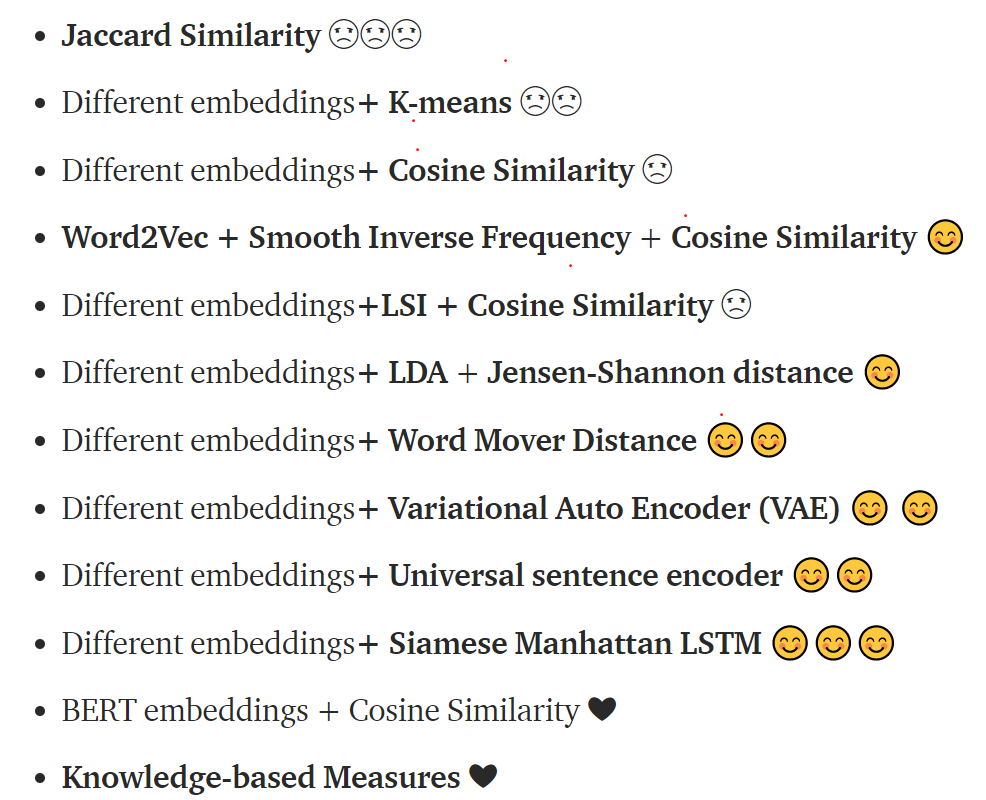

In [ ]:
from IPython.display import Image
Image(filename=r'D:\internship Experience\Fintech 2021\Different_techniques.png', width = 500, height =100)